## Lab 4: Simulation of Continuous System (mass spring damper system)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
F = 5  # force, in N
W = 0.5  # angular frequency of oscillation
t0 = 0  # start time, in sec
T = 50  # end time, in sec
dt = 0.01  # interval, in sec
N = int((T - t0) / dt)
t = np.arange(0, N) * dt  # sec

# Initials
u = np.zeros((N, 2))
u[0, :] = [0, 0]

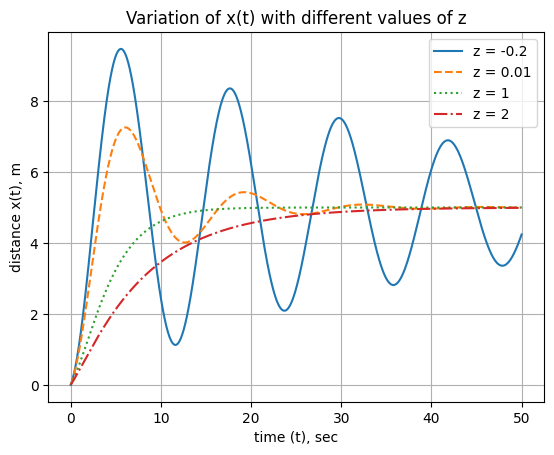

In [2]:
# Derivatives
def du(u, z):
    return np.array([u[1], (W**2) * (F - u[0]) - 2 * z * W * u[1]])

# Simulate
plt.figure(1)
damping_ratios = [-0.2, 0.01, 1, 2]
line_styles = ['-', '--', ':', '-.']
for k, z in enumerate(damping_ratios):
    for i in range(N - 1):
        m1 = du(u[i, :], z)
        m2 = du(u[i, :] + m1 / 2, z)
        m3 = du(u[i, :] + m2 / 2, z)
        m4 = du(u[i, :] + m3, z)
        u[i + 1, :] = u[i, :] + dt * (m1 + 2 * m2 + 2 * m3 + m4) / 6

    # Plot
    plt.plot(t, u[:, 0], label=f'z = {z}', linestyle=line_styles[k])

plt.grid(True)
plt.xlabel('time (t), sec')
plt.ylabel('distance x(t), m')
plt.title('Variation of x(t) with different values of z')
plt.legend()
plt.show()